In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
fake_texts = os.listdir('full_texts/fake')
true_texts = os.listdir('full_texts/true')

for t in fake_texts:
    with open('full_texts/fake/' + t, 'r', encoding='utf-8') as f:
        text = f.read() # texto como única string
        #text = f.readline() # le linha por linha
        #text = f.readlines() # le todas as linhas e bota numa lista
        f.close()
    print(text)
    break

Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.	

A senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.

“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.

Ué, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?

Sabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.

Ou seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.

Em tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação patética para a e

In [139]:
'''
META-INFORMATION FILES
0  author
1  link
2  category
3  date of publication
4  number of tokens
5  number of words without punctuation
6  number of types
7  number of links inside the news
8  number of words in upper case
9  number of verbs
10 number of subjuntive and imperative verbs
11 number of nouns
12 number of adjectives
13 number of adverbs
14 number of modal verbs (mainly auxiliary verbs)
15 number of singular first and second personal pronouns
16 number of plural first personal pronouns
17 number of pronouns
18 pausality
19 number of characters
20 average sentence length
21 average word length
22 percentage of news with speeling errors
23 emotiveness
24 diversity'''

fake_info = os.listdir('full_texts/fake-meta-information')
true_info = os.listdir('full_texts/true-meta-information')

i = 0
label = 'fake'
df = pd.DataFrame()

# para cada pasta
for files in [fake_info, true_info]:
    # le cada um dos arquivos
    for file in files:
        with open('full_texts/'+ label +'-meta-information/' + file, 'r', encoding='utf-8') as f:
            #text = f.read() # texto como única string
            #text = f.readline() # le linha por linha
            text = f.readlines() # le todas as linhas e bota numa lista
            f.close()
        # trocar "full_texts" por "size_normalized_texts" se ja quiser trabalhar com os textos normalizados
        file = file.split('-')[0] + '.txt'
        with open('full_texts/' + label + '/' + file, 'r', encoding='utf-8') as f2:
            text2 = f2.read()
            f2.close()
            
        # salva essas informações
        df.loc[i, 'label'] = label
        df.loc[i, 'file'] = file
        df.loc[i, 'category'] = text[2].replace('\n', '')
        df.loc[i, 'emotiveness'] = float(text[23].replace('\n', ''))
        df.loc[i, 'errors'] = float(text[22].replace('\n', ''))
        df.loc[i, 'pausatility'] = float(text[18].replace('\n', ''))
        df.loc[i, 'text'] = text2
        df.loc[i, 'tokens'] = float(text[4].replace('\n', ''))
        df.loc[i, 'words in upper case'] = float(text[8].replace('\n', ''))
        df.loc[i, 'average sentence length'] = float(text[20].replace('\n', ''))
        df.loc[i, 'nouns'] = float(text[11].replace('\n', ''))
        df.loc[i, 'verbs'] = float(text[9].replace('\n', ''))
        df.loc[i, 'adverbs'] = float(text[13].replace('\n', ''))
        df.loc[i, 'adjectives'] = float(text[12].replace('\n', ''))
        df.loc[i, 'pronouns'] = float(text[17].replace('\n', ''))
        
        # hate the bad formating not the player
        try:
            # formatação padrao ingles
            df.loc[i, 'date'] = datetime.strptime(text[3].replace('\n', '').split(' ')[0], '%Y-%m-%d').date()
        except:
            try:
                # esse segue a formatação brasileira
                df.loc[i, 'date'] = datetime.strptime(text[3].replace('\n', '').split(' ')[0], '%d/%m/%Y').date()
            except:
                try:
                    # esse é pq tem data com um espaço antes da data, ai o split da ruim
                    # o slipt[0] é necessário pq tem data solo e data com algum formato de hora logo após
                    df.loc[i, 'date'] = datetime.strptime(text[3].replace('\n', '').split(' ')[1], '%d/%m/%Y').date()
                except:
                    # esse foi pq cansei, algum arquivo deu q '16' não é um date pra converter, teria que ver a formatação desse arquivo
                    df.loc[i, 'date'] = np.nan
        i += 1
    label = 'true'

In [140]:
print(df.shape)
df.iloc[1220, :].head(200)

(7200, 16)


label                                                                   fake
file                                                                2098.txt
category                                                            politica
emotiveness                                                         0.129412
errors                                                                   0.0
pausatility                                                          3.30769
text                       Relatório da PF aponta que Lula recebeu vantag...
tokens                                                                 421.0
words in upper case                                                     22.0
average sentence length                                              29.0769
nouns                                                                  120.0
verbs                                                                   50.0
adverbs                                                                 10.0

In [141]:
df[df['file'].str.contains('1220')].head()

,label,file,category,emotiveness,errors,pausatility,text,tokens,words in upper case,average sentence length,nouns,verbs,adverbs,adjectives,pronouns,date
247,fake,1220.txt,tv_celebridades,0.194030,0.015038,2.81818,TV Record ignora pronunciamento de Temer e exi...,164.0,4.0,12.0909,45.0,22.0,6.0,7.0,8.0,2017-05-21
3847,true,1220.txt,tv_celebridades,0.174286,0.001259,2.90244,Temer afirma que Brasil poderá recorrer à OMC ...,913.0,14.0,19.3659,231.0,119.0,22.0,39.0,18.0,2018-03-14


In [142]:
df[df.index == 1220].head()

,label,file,category,emotiveness,errors,pausatility,text,tokens,words in upper case,average sentence length,nouns,verbs,adverbs,adjectives,pronouns,date
1220,fake,2098.txt,politica,0.129412,0.0,3.30769,Relatório da PF aponta que Lula recebeu vantag...,421.0,22.0,29.0769,120.0,50.0,10.0,12.0,10.0,2016-10-06


In [143]:
# 3600 fake e 3600 true
data = pd.read_csv('preprocessed/pre-processed.csv')

data[data['index'] == 1220].head()

### ATENÇÃO ###
## os index do arquivo pre-processed não batem com o nome dos arquivos da pasta full_text, 
## tanto o arquivo cru quanto o meta-information, porém, o index pelo df batem, isso provavelmente pq usaram python tmb
## e o python ordenou 1, 10, 1000, 1001, 1002, ... como os primeiros, por se tratar de string e não número, 
## ai o index fico zuado e eles não trocaram pelo verdadeiro número do arquivo

## realizar essa consideração quando utilizar o csv do pre-processed

,index,label,preprocessed_news
1220,1220,fake,relatorio pf aponta lula recebeu vantagens obr...


### Processing of the texts

In [144]:
from textblob import TextBlob
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

import unidecode
from sklearn.feature_extraction.text import CountVectorizer 

In [145]:
# remover acentos e stopwords
def remove_accents(input_str):
    only_ascii = unidecode.unidecode(input_str)
    return only_ascii

stops = list(set(stopwords.words('portuguese')))
for i in range(0, len(stops)):
  stops[i] = remove_accents(stops[i])

def remove_stopwords(text):
  words = text.split()
  words = [word for word in words if word not in stops]
  return ' '.join(words)


df['text'] = df['text'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['text'] = df['text'].apply(remove_stopwords)

df[df['file'].str.contains('1220')].head()

,label,file,category,emotiveness,errors,pausatility,text,tokens,words in upper case,average sentence length,nouns,verbs,adverbs,adjectives,pronouns,date
247,fake,1220.txt,tv_celebridades,0.194030,0.015038,2.81818,TV Record ignora pronunciamento Temer exibe pi...,164.0,4.0,12.0909,45.0,22.0,6.0,7.0,8.0,2017-05-21
3847,true,1220.txt,tv_celebridades,0.174286,0.001259,2.90244,Temer afirma Brasil podera recorrer OMC junto ...,913.0,14.0,19.3659,231.0,119.0,22.0,39.0,18.0,2018-03-14


In [146]:
print(df['category'].value_counts())

for i in df['category'].value_counts().index:
    df.loc[df['category'].str.contains(i), i] = 1
    df.loc[:, i].fillna(0, inplace=True)
    
df.loc[df['label'].str.contains('true'), 'true'] = 1
df['true'].fillna(0, inplace=True)

df['category'].fillna(0, inplace=True)
df.head()

politica               4180
tv_celebridades        1544
sociedade_cotidiano    1276
ciencia_tecnologia      112
religiao                 44
economia                 44
Name: category, dtype: int64


,label,file,category,emotiveness,errors,pausatility,text,tokens,words in upper case,average sentence length,...,adjectives,pronouns,date,politica,tv_celebridades,sociedade_cotidiano,ciencia_tecnologia,religiao,economia,true
0,fake,1.txt,politica,0.263158,0.000000,2.000000,"Katia Abreu diz vai colocar expulsao moldura, ...",211.0,6.0,14.23080,...,7.0,26.0,2017-11-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,fake,10.txt,politica,0.241667,0.007874,2.500000,"Dr. Ray peita Bolsonaro, chama-o conservador f...",289.0,0.0,18.14290,...,11.0,20.0,2017-11-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,fake,100.txt,politica,0.127820,0.003636,1.812500,Reinaldo Azevedo desmascarado Policia Federal....,304.0,0.0,17.18750,...,9.0,18.0,2017-05-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,fake,1000.txt,politica,0.229008,0.001748,2.680000,Relatorio assustador BNDES mostra dinheiro pub...,639.0,14.0,22.88000,...,39.0,34.0,2017-07-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fake,1001.txt,politica,0.269231,0.000000,0.894737,"Radialista americano fala sobre PT: ""Eles vend...",128.0,1.0,5.84211,...,6.0,12.0,2017-07-25,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance

X = df[['emotiveness', 'errors', 'pausatility', 'tokens', 'words in upper case', 'average sentence length',
        'nouns', 'verbs', 'adverbs', 'adjectives', 'pronouns', 'politica', 'tv_celebridades', 'sociedade_cotidiano',
        'ciencia_tecnologia', 'religiao', 'economia']]
y = df[['true']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

print(f"F1-Score Train: {f1_score(y_train, y_pred_train, average='binary')}")
print(f"F1-Score Test: {f1_score(y_test, y_pred_test, average='binary')}")

C:\Users\Xinda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



F1-Score Train: 0.9318420132820692
F1-Score Test: 0.9284712482468442
[-6.01851852e-04  1.38888889e-04  3.61111111e-03  3.63981481e-01
  3.24074074e-04  2.27314815e-02 -1.11111111e-03  9.72222222e-04
 -1.85185185e-04 -1.85185185e-04 -3.70370370e-04 -1.85185185e-04
 -4.62962963e-05 -2.31481481e-04  6.01851852e-04  3.70370370e-04
  9.72222222e-04]
Index(['emotiveness', 'errors', 'pausatility', 'tokens', 'words in upper case',
       'average sentence length', 'nouns', 'verbs', 'adverbs', 'adjectives',
       'pronouns', 'politica', 'tv_celebridades', 'sociedade_cotidiano',
       'ciencia_tecnologia', 'religiao', 'economia'],
      dtype='object')


Árvore de regressão (max_depth = 2)
F1-Score Train: 0.942240779401531
F1-Score Test: 0.9410942956926658
|--- tokens <= 426.00
|   |--- tokens <= 319.50
|   |   |--- class: 0.0
|   |--- tokens >  319.50
|   |   |--- class: 0.0
|--- tokens >  426.00
|   |--- tokens <= 556.00
|   |   |--- class: 1.0
|   |--- tokens >  556.00
|   |   |--- class: 1.0

Árvore de regressão (max_depth = 5)
F1-Score Train: 0.963913948646773
F1-Score Test: 0.9380654140570632
Index(['emotiveness', 'errors', 'pausatility', 'tokens', 'words in upper case',
       'average sentence length', 'nouns', 'verbs', 'adverbs', 'adjectives',
       'pronouns', 'politica', 'tv_celebridades', 'sociedade_cotidiano',
       'ciencia_tecnologia', 'religiao', 'economia'],
      dtype='object')


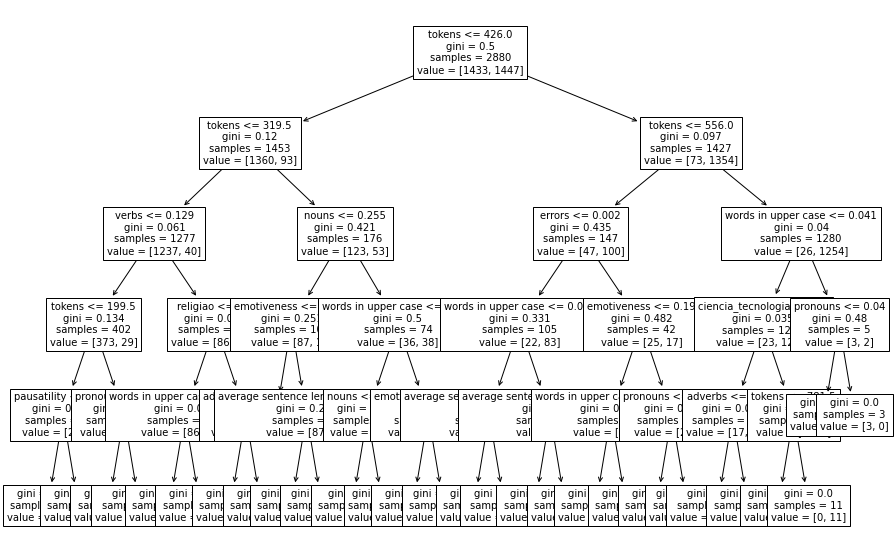

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

dtr2 = DecisionTreeClassifier(max_depth=2)
dtr5 = DecisionTreeClassifier(max_depth=5)

dtr2 = dtr2.fit(X_train, y_train)
dtr5 = dtr5.fit(X_train, y_train)

y_pred_train_1 = dtr2.predict(X_train)
y_pred_test_1 = dtr2.predict(X_test)

y_pred_train_2 = dtr5.predict(X_train)
y_pred_test_2 = dtr5.predict(X_test)

print("Árvore de regressão (max_depth = 2)")
print(f"F1-Score Train: {f1_score(y_train, y_pred_train_1, average='binary')}")
print(f"F1-Score Test: {f1_score(y_test, y_pred_test_1, average='binary')}")
print(tree.export_text(dtr2, feature_names=list(X.columns)))

print("Árvore de regressão (max_depth = 5)")
print(f"F1-Score Train: {f1_score(y_train, y_pred_train_2, average='binary')}")
print(f"F1-Score Test: {f1_score(y_test, y_pred_test_2, average='binary')}")

plt.figure(figsize=(15,10))
tree.plot_tree(dtr5, fontsize=10, feature_names=list(X.columns), filled=True)


print(X_train.columns)

Parece que quanto maior o texto, mais chances de ser uma noticia verdadeira, iremos colocar a quantidade de substantivos, adjetivos, verbos, etc.. em porcentagem em relação à quantidade de palavras (tokens) e iremos retirar a feature tokens, para ver quais outros parametros serão os mais decisivos para a performance do algoritimo de predição

In [169]:
for c in df.loc[:, 'politica':'economia'].columns:
    print(c)
    print(df.loc[df[c] == 1, 'label'].value_counts())

politica
true    2090
fake    2090
Name: label, dtype: int64
tv_celebridades
true    772
fake    772
Name: label, dtype: int64
sociedade_cotidiano
fake    638
true    638
Name: label, dtype: int64
ciencia_tecnologia
true    56
fake    56
Name: label, dtype: int64
religiao
true    22
fake    22
Name: label, dtype: int64
economia
true    22
fake    22
Name: label, dtype: int64


In [171]:
print(df.loc[df['tokens'] > 426, 'label'].value_counts())
print(df.loc[df['tokens'] <= 426, 'label'].value_counts())

true    3375
fake     194
Name: label, dtype: int64
fake    3406
true     225
Name: label, dtype: int64


In [154]:
lista = ['words in upper case', 'average sentence length', 'nouns', 'verbs', 'adverbs', 'adjectives', 'pronouns']
for i in lista:
    df.loc[:, i] = df.loc[:, i] / df.loc[:, 'tokens']

In [155]:
df.head()

,label,file,category,emotiveness,errors,pausatility,text,tokens,words in upper case,average sentence length,...,adjectives,pronouns,date,politica,tv_celebridades,sociedade_cotidiano,ciencia_tecnologia,religiao,economia,true
0,fake,1.txt,politica,0.263158,0.000000,2.000000,"Katia Abreu diz vai colocar expulsao moldura, ...",211.0,0.028436,0.067445,...,0.033175,0.123223,2017-11-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,fake,10.txt,politica,0.241667,0.007874,2.500000,"Dr. Ray peita Bolsonaro, chama-o conservador f...",289.0,0.000000,0.062778,...,0.038062,0.069204,2017-11-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,fake,100.txt,politica,0.127820,0.003636,1.812500,Reinaldo Azevedo desmascarado Policia Federal....,304.0,0.000000,0.056538,...,0.029605,0.059211,2017-05-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,fake,1000.txt,politica,0.229008,0.001748,2.680000,Relatorio assustador BNDES mostra dinheiro pub...,639.0,0.021909,0.035806,...,0.061033,0.053208,2017-07-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fake,1001.txt,politica,0.269231,0.000000,0.894737,"Radialista americano fala sobre PT: ""Eles vend...",128.0,0.007812,0.045641,...,0.046875,0.093750,2017-07-25,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Árvore de regressão (max_depth = 2)
F1-Score Train: 0.8978178039487357
F1-Score Test: 0.8907913003239242
|--- average sentence length <= 0.04
|   |--- average sentence length <= 0.03
|   |   |--- class: 1.0
|   |--- average sentence length >  0.03
|   |   |--- class: 1.0
|--- average sentence length >  0.04
|   |--- average sentence length <= 0.06
|   |   |--- class: 0.0
|   |--- average sentence length >  0.06
|   |   |--- class: 0.0

Árvore de regressão (max_depth = 5)
F1-Score Train: 0.9339853300733496
F1-Score Test: 0.906118636151331
Index(['emotiveness', 'errors', 'pausatility', 'words in upper case',
       'average sentence length', 'nouns', 'verbs', 'adverbs', 'adjectives',
       'pronouns', 'politica', 'tv_celebridades', 'sociedade_cotidiano',
       'ciencia_tecnologia', 'religiao', 'economia'],
      dtype='object')


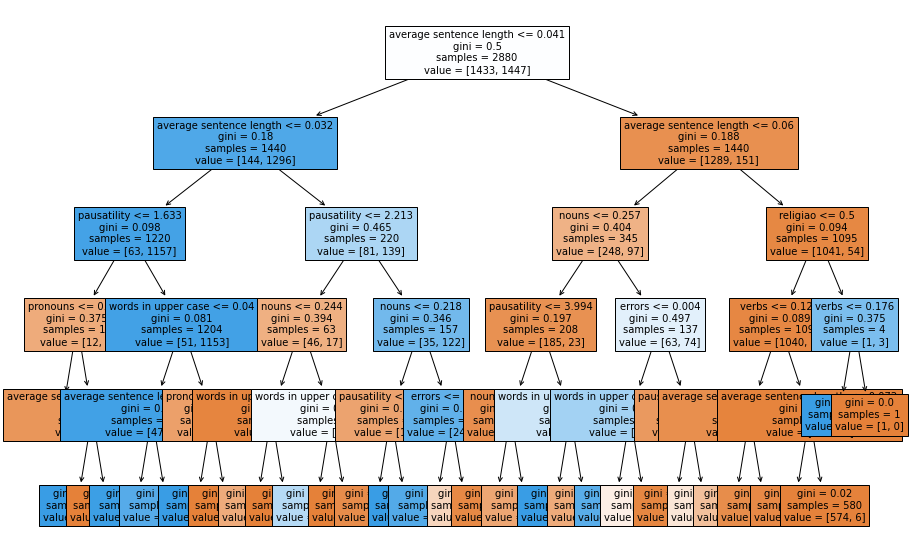

In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

X = df[['emotiveness', 'errors', 'pausatility', 'words in upper case', 'average sentence length',
        'nouns', 'verbs', 'adverbs', 'adjectives', 'pronouns', 'politica', 'tv_celebridades', 'sociedade_cotidiano',
        'ciencia_tecnologia', 'religiao', 'economia']]
y = df[['true']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

dtr2 = DecisionTreeClassifier(max_depth=2)
dtr5 = DecisionTreeClassifier(max_depth=5)

dtr2 = dtr2.fit(X_train, y_train)
dtr5 = dtr5.fit(X_train, y_train)

y_pred_train_1 = dtr2.predict(X_train)
y_pred_test_1 = dtr2.predict(X_test)

y_pred_train_2 = dtr5.predict(X_train)
y_pred_test_2 = dtr5.predict(X_test)

print("Árvore de regressão (max_depth = 2)")
print(f"F1-Score Train: {f1_score(y_train, y_pred_train_1, average='binary')}")
print(f"F1-Score Test: {f1_score(y_test, y_pred_test_1, average='binary')}")
print(tree.export_text(dtr2, feature_names=list(X.columns)))

print("Árvore de regressão (max_depth = 5)")
print(f"F1-Score Train: {f1_score(y_train, y_pred_train_2, average='binary')}")
print(f"F1-Score Test: {f1_score(y_test, y_pred_test_2, average='binary')}")

plt.figure(figsize=(15,10))
tree.plot_tree(dtr5, fontsize=10, feature_names=list(X.columns), filled=True)


print(X_train.columns)

Agora retirando average sentence length

Árvore de regressão (max_depth = 2)
F1-Score Train: 0.7437185929648241
F1-Score Test: 0.7492076906824424
|--- pausatility <= 2.20
|   |--- words in upper case <= 0.02
|   |   |--- class: 0.0
|   |--- words in upper case >  0.02
|   |   |--- class: 0.0
|--- pausatility >  2.20
|   |--- words in upper case <= 0.02
|   |   |--- class: 1.0
|   |--- words in upper case >  0.02
|   |   |--- class: 0.0

Árvore de regressão (max_depth = 5)
F1-Score Train: 0.7946834557537601
F1-Score Test: 0.7708133971291867


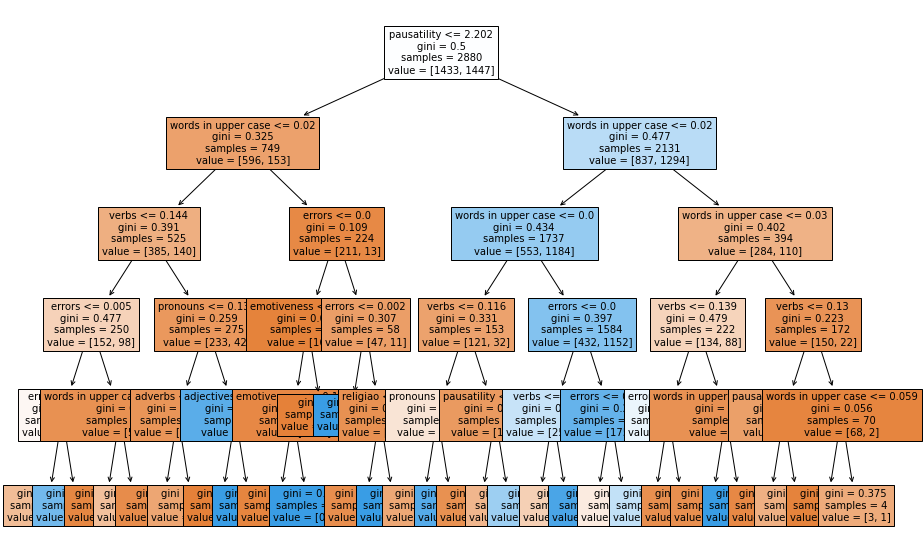

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

X = df[['emotiveness', 'errors', 'pausatility', 'words in upper case',
        'nouns', 'verbs', 'adverbs', 'adjectives', 'pronouns', 'politica', 'tv_celebridades', 'sociedade_cotidiano',
        'ciencia_tecnologia', 'religiao', 'economia']]
y = df[['true']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

dtr2 = DecisionTreeClassifier(max_depth=2)
dtr5 = DecisionTreeClassifier(max_depth=5)

dtr2 = dtr2.fit(X_train, y_train)
dtr5 = dtr5.fit(X_train, y_train)

y_pred_train_1 = dtr2.predict(X_train)
y_pred_test_1 = dtr2.predict(X_test)

y_pred_train_2 = dtr5.predict(X_train)
y_pred_test_2 = dtr5.predict(X_test)

print("Árvore de regressão (max_depth = 2)")
print(f"F1-Score Train: {f1_score(y_train, y_pred_train_1, average='binary')}")
print(f"F1-Score Test: {f1_score(y_test, y_pred_test_1, average='binary')}")
print(tree.export_text(dtr2, feature_names=list(X.columns)))

print("Árvore de regressão (max_depth = 5)")
print(f"F1-Score Train: {f1_score(y_train, y_pred_train_2, average='binary')}")
print(f"F1-Score Test: {f1_score(y_test, y_pred_test_2, average='binary')}")

plt.figure(figsize=(15,10))
tree.plot_tree(dtr5, fontsize=10, feature_names=list(X.columns), filled=True)
plt.show()

Vemos que as próximas 2 informações mais revelantes para dizer se uma notícia é ou não fake são a pausalidade e quantidades de palavras em upper case

### Resumindo

Features mais importantes para dizer se um texto é fake news ou não:

- Número de palavras -> se tiver mais que 426, altas as chances de ser verdade, menos que isso, provavelmente é falso.
- Tamanho médio de sentenças -> quando menor que 0.04, maior a probabilidade de ser verdade e vice versa.
- Pausalidade -> se menor que 2.2, maiores as chances de ser verdadeiro
- Palavras em caixa alta -> se menos que 0.02% da palavras no texto forem em caixa alta, maior a chance de serem verdadeiras